# Voice Identification Experiment 1

This is the ipynb file for the Digital Signal Processing Experiment.

## Data Preprocessing 

I choose to use the simple endpoint detection to simplify the classification process. To be more specific, I choose to ignore all the noize data whose absolute value is lower than 0.05.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


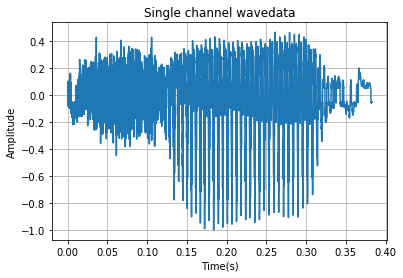

In [2]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import os
 
#filepath = "" #添加路径
filename = 'ryan71.wav'
#filename= os.listdir(filepath) #得到文件夹下的所有文件名称 
f = wave.open(filename,'rb')
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
strData = f.readframes(nframes)#读取音频，字符串格式
waveData = np.fromstring(strData,dtype=np.int16)#将字符串转化为int
waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
Data = []
j = 0
for i in range(len(waveData)):
    if abs(waveData[i]) > 0.05:
        Data.append(waveData[i])
        j+=1
    
# plot the wave
time = np.arange(0,j)*(1.0 / framerate)
plt.plot(time,Data)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Single channel wavedata")
plt.grid('on')#标尺，on：有，off:无。

Firstly we try to preprocess the wavedata using multiple method.

## Enframe, Energy and ZCR

In this code, I use only 2 wav file to test the program which contains the voice information of zero and seven. I used multiple functions to detect the endpoints of voice and counting the Energy and ZCR to find different features of voice information. The figures of different features are shown below. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:61: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


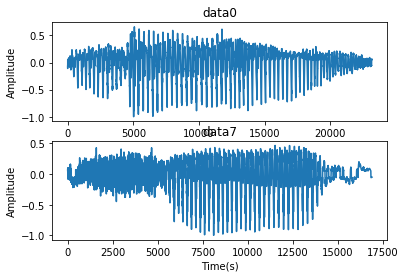

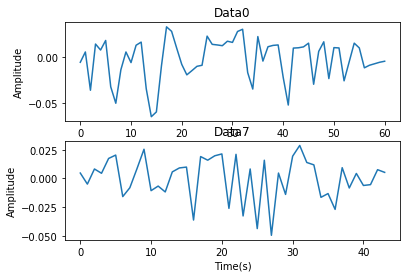

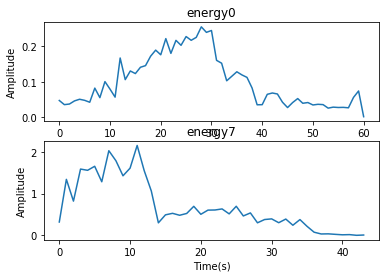

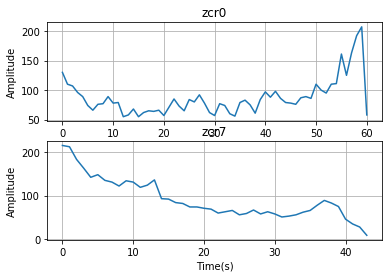

In [5]:
import numpy as np
import wave
import os
import math
import scipy.signal as signal

def Enframe(wavData, frameSize, overlap):
    coeff = 0.97 # 预加重系数
    wlen = len(wavData)
    step = frameSize - overlap
    frameNum = math.ceil(wlen / step)
    frameData = np.zeros((frameSize, frameNum))

    hamwin = np.hamming(frameSize)

    for i in range(frameNum):
        singleFrame = wavData[np.arange(i * step, min(i * step + frameSize, wlen))]
        singleFrame = np.append(singleFrame[0], singleFrame[:-1] - coeff * singleFrame[1:]) # 预加重
        frameData[:len(singleFrame), i] = singleFrame
        frameData[:, i] = hamwin * frameData[:, i] # 加窗

    return frameData

def wavread(filename):
    f = wave.open(filename,'rb')
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)#读取音频，字符串格式
    waveData = np.fromstring(strData,dtype=np.int16)#将字符串转化为int
    f.close()
    waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
    Data = []
    j = 0
    for i in range(len(waveData)):
        if abs(waveData[i]) > 0.05:
            Data.append(waveData[i])
            j+=1
    waveData = np.reshape(Data,[j,nchannels]).T
    return waveData

# 计算每一帧的过零率
def ZCR(frameData):
    frameNum = frameData.shape[1]
    frameSize = frameData.shape[0]
    zcr = np.zeros((frameNum, 1))

    for i in range(frameNum):
        singleFrame = frameData[:, i]
        temp = singleFrame[:frameSize-1] * singleFrame[1:frameSize]
        temp = np.sign(temp)
        zcr[i] = np.sum(temp<0)

    return zcr


# 计算每一帧能量
def energy(frameData):
    frameNum = frameData.shape[1]

    ener = np.zeros((frameNum, 1))

    for i in range(frameNum):
        singleframe = frameData[:, i]
        ener[i] = sum(singleframe * singleframe)

    return ener
#filepath = "./data/" #添加路径
#dirname= os.listdir(filepath) #得到文件夹下的所有文件名称 
#filename = filepath+dirname[0]
filename7 = "ryan71.wav"
filename0 = "ryan02.wav"
data0 = wavread(filename0)
data7 = wavread(filename7)
nw = 512
inc = 128
winfunc = signal.hamming(nw)
#Frame = enframe(data[0], nw, inc, winfunc)
Frame0 = Enframe(data0[0], nw, inc) 
Frame7 = Enframe(data7[0], nw, inc)
Energy0 = energy(Frame0)
zcr0 = ZCR(Frame0)
Energy7 = energy(Frame7)
zcr7 = ZCR(Frame7)
time = np.arange(0,nframes)*(1.0 / framerate)
plt.figure(1)
plt.subplot(211)
plt.plot(data0[0])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("data0")
plt.subplot(212)
plt.plot(data7[0])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("data7")
plt.figure(2)
plt.subplot(211)
plt.plot(Frame0[0])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Data0")
plt.subplot(212)
plt.plot(Frame7[0])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Data7")
plt.figure(3)
plt.subplot(211)
plt.plot(Energy0)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("energy0")
plt.subplot(212)
plt.plot(Energy7)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("energy7")
plt.figure(4)
plt.subplot(211)
plt.plot(zcr0)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("zcr0")
plt.grid('on')#标尺，on：有，off:无。
plt.subplot(212)
plt.plot(zcr7)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("zcr7")


plt.grid('on')#标尺，on：有，off:无。
